# Table of Content
1. List of lemmatized words in train data
2. List of stop words in train data
3. Random Forest OOB error analysis
4. Difference in distribution on removing numbers
    1. KL divergence
    2. KS test
    

In [5]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [6]:
df= pd.read_csv('/data/DS_INTERN/data/RAW_DATA/train_test_data.csv', low_memory=False)

In [7]:
from j import *

In [8]:
add_target_column(df)

,Unnamed: 0,COUNTRY_CODE,DEPT_NBR,DEPT_DESC,MDS_FAM_ID,UPC_DESC,CATG_DESC,SUBCATG_DESC,FINELINE_DESC,SIGNING_DESC,ITEM1_DESC,ITEM2_DESC,SBU,SP_CLASS,FEAT1,REVISED_CATEGORY,REVISED_VARIETY,TARGET
0,6241827,US,94,PRODUCE,42706762,UPC,FASTENER,TWISTTIE RUBBERBANDS,1036 TWISTTIE RUBBAN FOOD,NaN,TIE 18 ESCAROLE SM,SC NHM,FOOD,PRODUCE & FLOWERS,TIE 18 ESCAROLE SM SC NHM UPC FASTENER TWISTTI...,NaN,NaN,NaN
1,6241828,US,94,PRODUCE,91580188,ODW BRSGOMEG,PREMIUM BEVERAGE,SUPER PREMIUM BEVERAGE,POM,ODWALLA BERRY GO MEGA 12OZ,JUICE BRY OMEGA 12FO O,ODW BERRY GOMEGA,FOOD,PRODUCE & FLOWERS,ODWALLA BERRY GO MEGA 12OZ JUICE BRY OMEGA 12F...,NaN,NaN,NaN
2,6241829,US,94,PRODUCE,86896524,NECTOR,PREMIUM BEVERAGE,SUPER PREMIUM BEVERAGE,POM,ODWALLA C MONSTER NECTAR 12FO,ODW C MONSTER 12OZ,ODWALLA,FOOD,PRODUCE & FLOWERS,ODWALLA C MONSTER NECTAR 12FO ODW C MONSTER 12...,NaN,NaN,NaN
3,6241830,US,94,PRODUCE,91580181,JUICE,PREMIUM BEVERAGE,SUPER PREMIUM BEVERAGE,POM,ODWALLA ORANGE JUICE,JUICE OJ 12 FO O,ODW OJ,FOOD,PRODUCE & FLOWERS,ODWALLA ORANGE JUICE JUICE OJ 12 FO O ODW OJ J...,NaN,NaN,NaN
4,6241831,US,94,PRODUCE,91988756,RASP LMNGRS,PREMIUM BEVERAGE,SUPER PREMIUM BEVERAGE,POM,RAAW JUICE RASPBERRY LEMONGRASS,RAAW RASP LEMNGRS,NaN,FOOD,PRODUCE & FLOWERS,RAAW JUICE RASPBERRY LEMONGRASS RAAW RASP LEMN...,NaN,NaN,NaN
5,6241832,US,94,PRODUCE,93957505,JUICE,PREMIUM BEVERAGE,SUPER PREMIUM BEVERAGE,POM,VERY BERRY WHEATGRASS JUICE 12OZ,JUICE VBW 12OZ R,NaN,FOOD,PRODUCE & FLOWERS,BERRY WHEATGRASS JUICE 12OZ JUICE VBW 12OZ R J...,NaN,NaN,NaN
6,6241833,US,94,PRODUCE,91580180,ODW CARROT,PREMIUM BEVERAGE,SUPER PREMIUM BEVERAGE,NAKED BOLTHOUSE MID,ODWALLA CARROT 12OZ,JUICE CARROT 12 FO O,ODW CARROT,FOOD,PRODUCE & FLOWERS,ODWALLA CARROT 12OZ JUICE CARROT 12 FO O ODW C...,NaN,NaN,NaN
7,6241834,US,94,PRODUCE,91553284,MANGINCARROT,PREMIUM BEVERAGE,SUPER PREMIUM BEVERAGE,BOLTHOUSE SINGLE SRV,11OZ MANGO GINGER CARROT,11OZMANGOGINGERCARR,JUICE,FOOD,PRODUCE & FLOWERS,11OZ MANGO GINGER CARROT 11OZMANGOGINGERCARR J...,NaN,NaN,NaN
8,6241835,US,94,PRODUCE,207837027,PPXBF 6,PREMIUM BEVERAGE,SUPER PREMIUM BEVERAGE,NAKED BOLTHOUSE LG,BHF VANILLA CHAI LATTE 52OZ,52OZ VANILLA CHAI LA,VANILLA CHAI LATTE,FOOD,PRODUCE & FLOWERS,BHF VANILLA CHAI LATTE 52OZ 52OZ VANILLA CHAI ...,BEVERAGES,BOLTHOUSE JUICE,BEVERAGES_BOLTHOUSE JUICE
9,6241836,US,94,PRODUCE,94299930,JUICE,PREMIUM BEVERAGE,SUPER PREMIUM BEVERAGE,NAKED BOLTHOUSE LG,ENERGY ACAI BERRY JUICE 1L,SAM ENERGY 33.8FO,NaN,FOOD,PRODUCE & FLOWERS,ENERGY ACAI BERRY JUICE 1L SAM ENERGY 33 8FO J...,BEVERAGES,BOLTHOUSE JUICE,BEVERAGES_BOLTHOUSE JUICE


In [9]:
train_df, test_df = train_test_split(df)

In [10]:
X_train = train_df['FEAT1']

X_train = remove_stopwords(X_train)
X_train = perform_lemmatization(X_train)
X_train = remove_single_char_words(X_train)
X_train = remove_noise_words(X_train)

Y_train = train_df['TARGET']

In [11]:
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [12]:
# tfidf = TfidfVectorizer()

# tfidf.fit_transform(X_train)

In [13]:
# len(tfidf.get_feature_names())

In [14]:
# 5815
# 5764 sc,sw,l
# 5764 sw,l,sc

# List of Lemmatized words and stop words

In [15]:
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.
stop_words = stopwords.words('english')

from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
train_df['FEAT1_w/o_SW'] = train_df['FEAT1'].apply(lambda x: [w.upper() for w in x.lower().split() if w not in stop_words])

In [17]:
train_df['FEAT1_w/o_SW_Lemmatized'] = train_df['FEAT1_w/o_SW'].apply(lambda x: [lmtzr.lemmatize(w.lower()).upper() for w in x])

In [18]:
train_df['difference'] = train_df.apply(lambda x: list((set(x['FEAT1_w/o_SW'])-set(x['FEAT1_w/o_SW_Lemmatized']))), axis=1)

In [19]:
def f(x):
    
    if len(x)==0:
        return
    elif len(x)==3:
        print(x)
    

In [20]:
for i in range(len(train_df)):
    f(train_df.iloc[i]['difference'])

['MIXES', 'RS', 'CS']
['MIXES', 'RS', 'CS']


In [21]:
lmtzr.lemmatize('grilled')

'grilled'

# Remove single character words from lemmatized words

In [22]:
import re
train_df['final'] = train_df['FEAT1_w/o_SW_Lemmatized'].apply(lambda x: [re.sub(r"\b[a-zA-Z]\b",'', w) for w in x ])

# Note:
final column- contains list of strings. single character strings were replaced with ''. so we need to remove the empty strings from the list of strings present in final column.

In [23]:
def remove_empty(test_list):
    while("" in test_list) :
        test_list.remove("")
    return test_list

In [24]:
train_df['final'] = train_df['final'].apply(lambda x: [w for w in x if len(w)>0])

In [25]:
train_df['diff_actual'] = train_df.apply(lambda x: list((set(x['FEAT1_w/o_SW'])-set(x['final']))), axis=1)

In [26]:
for i in range(len(train_df)):
    f(train_df.iloc[i]['diff_actual'])

#train_df['diff_actual'].apply(lambda x: len(x)).value_counts()

['DS', 'B', 'SS']
['DS', 'B', 'SS']
['DS', 'B', 'SS']
['P', 'H', 'JSS']
['NS', 'JSS', 'R']
['SS', 'JSS', 'R']
['P', 'H', 'PCS']
['P', 'H', 'PCS']
['NS', 'JSS', 'R']
['SS', 'JSS', 'R']
['DS', 'JIMMYS', 'L']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['SS', 'K', 'C']
['DCS', 'P', 'B']
['G', 'R', 'W']
['G', 'F', 'W']
['C', 'FS', 'W']
['C', 'FS', 'W']
['MS', 'PAS', 'W']
['MS', 'PAS', 'W']
['G', 'NAS', 'H']
['MIXES', 'C', 'B']
['X', 'MIXES', 'G']
['MIXES', 'H', 'R']
['MIXES', 'GS', 'W']
['MIXES', 'R', 'RAS']
['MIXES', 'RS', 'CS']
['MIXES', 'RS', 'CS']
['SS', 'K', 'C']


In [27]:
lemmatized_words = []

for i in range(len(train_df)):
    
    lemmatized_words += (train_df.iloc[i]['diff_actual'])

(set(lemmatized_words))

{'AMS',
 'B',
 'BAS',
 'BHS',
 'BLACKBERRIES',
 'BOXES',
 'BS',
 'BUSHMANS',
 'C',
 'CASS',
 'CFS',
 'CHICKPEAS',
 'CHILES',
 'CHIVES',
 'CLAMSHELLS',
 'CLS',
 'COLOURS',
 'CRSS',
 'CS',
 'CTS',
 'CUKES',
 'DAS',
 'DCS',
 'DS',
 'E',
 'EAS',
 'ES',
 'ESS',
 'EXS',
 'F',
 'FILETS',
 'FRIES',
 'FS',
 'G',
 'GDS',
 'GS',
 'GUPPIES',
 'H',
 'HASS',
 'HFCS',
 'HMS',
 'HS',
 'INS',
 'J',
 'JIMMYS',
 'JS',
 'JSS',
 'K',
 'KABOBS',
 'KANSAS',
 'KIDS',
 'KS',
 'L',
 'LAS',
 'LBS',
 'LEAVES',
 'LS',
 'MANGOS',
 'MARIES',
 'MEATBALLS',
 'MELISSAS',
 'MIXES',
 'MOTTS',
 'MS',
 'MULBERRIES',
 'MUS',
 'N',
 'NAS',
 'NJS',
 'NS',
 'ORNAMENTALS',
 'OS',
 'P',
 'PAS',
 'PBS',
 'PCS',
 'PEASE',
 'POMPS',
 'POS',
 'POUCHES',
 'PS',
 'PUMMELOS',
 'PUMPKINSEEDS',
 'Q',
 'R',
 'RADISHES',
 'RAS',
 'ROMA',
 'ROMAS',
 'RS',
 'RSS',
 'SATS',
 'SGS',
 'SLS',
 'SNACKERS',
 'SS',
 'TS',
 'U',
 'US',
 'V',
 'VS',
 'W',
 'WS',
 'X',
 'Z',
 'ZAGS'}

In [28]:
len(lemmatized_words)

6850

In [29]:
stopwords = train_df['FEAT1'].apply(lambda x: [w.upper() for w in x.lower().split() if w in stop_words])

In [30]:
stopwords_list = []

for i in range(len(train_df)):
    
    stopwords_list += (stopwords.iloc[i])

len((stopwords_list))

2237

In [31]:
stopwords.iloc[0]

[]

# Random Forest- OOB error analysis

In [32]:
# import matplotlib.pyplot as plt

# from collections import OrderedDict

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# tfidf = TfidfVectorizer(min_df=10)
# X_train_dtm = tfidf.fit_transform(X_train).toarray()


# # NOTE: Setting the `warm_start` construction parameter to `True` disables
# # support for parallelized ensembles but is necessary for tracking the OOB
# # error trajectory during training.

# RANDOM_STATE = 123

# ensemble_clfs = [
# #     ("RandomForestClassifier, max_features='sqrt'",
# #         RandomForestClassifier(warm_start=True, oob_score=True,
# #                                max_features="sqrt",
# #                                random_state=RANDOM_STATE)),
# #     ("RandomForestClassifier, max_features='log2'",
# #         RandomForestClassifier(warm_start=True, max_features='log2',
# #                                oob_score=True,
# #                                random_state=RANDOM_STATE)),
#     ("RandomForestClassifier, max_features='auto'",
#         RandomForestClassifier(warm_start=True, max_features='auto',
#                                oob_score=True,
#                                random_state=0))
# ]

# # Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
# error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# # Range of `n_estimators` values to explore.
# min_estimators = 100
# max_estimators = 200

# for label, clf in ensemble_clfs:
#     for i in range(min_estimators, max_estimators + 1,5):
#         clf.set_params(n_estimators=i)
#         clf.fit(X_train_dtm, Y_train)

#         # Record the OOB error for each `n_estimators=i` setting.
#         oob_error = 1 - clf.oob_score_
#         error_rate[label].append((i, oob_error))

# # Generate the "OOB error rate" vs. "n_estimators" plot.
# for label, clf_err in error_rate.items():
#     xs, ys = zip(*clf_err)
#     plt.plot(xs, ys, label=label)

# plt.xlim(min_estimators, max_estimators)
# plt.xlabel("n_estimators")
# plt.ylabel("OOB error rate")
# plt.legend(loc="upper right")
# plt.show()

# Difference in distributions
1. Remove all numbers. Ex- 11oz --> oz, 2

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

from w import *


%matplotlib inline
sns.set_style("whitegrid")

df= pd.read_csv('/data/DS_INTERN/data/RAW_DATA/train_test_data.csv', low_memory=False)

df1 = add_target_column(df)

train_df , test_df = train_test_split(df1)


train_df['FEAT1'] = pd.Series(perform_spell_correction_manual(train_df['FEAT1']), index=train_df.index)
train_df['FEAT1'] = pd.Series(perform_spell_correction_walmart(train_df['FEAT1']), index=train_df.index)
train_df['FEAT1'] = pd.Series(remove_stopwords(train_df['FEAT1']), index=train_df.index)
#train_df['FEAT1'] = pd.Series(remove_numbers(train_df['FEAT1']), index=train_df.index)
train_df['FEAT1'] = pd.Series(perform_lemmatization(train_df['FEAT1']), index=train_df.index)
#train_df['FEAT1'] = pd.Series(remove_two_and_single_char_words(train_df['FEAT1']), index=train_df.index)
train_df['FEAT1'] = pd.Series(remove_single_char_words(train_df['FEAT1']), index=train_df.index)
train_df['FEAT1'] = pd.Series(remove_noise_words(train_df['FEAT1']), index=train_df.index)

test_df['FEAT1'] = pd.Series(perform_spell_correction_manual(test_df['FEAT1']), index=test_df.index)
test_df['FEAT1'] = pd.Series(perform_spell_correction_walmart(test_df['FEAT1']), index=test_df.index)
test_df['FEAT1'] = pd.Series(remove_stopwords(test_df['FEAT1']), index=test_df.index)
#test_df['FEAT1'] = pd.Series(remove_numbers(test_df['FEAT1']), index=test_df.index)
test_df['FEAT1'] = pd.Series(perform_lemmatization(test_df['FEAT1']), index=test_df.index)
test_df['FEAT1'] = pd.Series(remove_single_char_words(test_df['FEAT1']), index=test_df.index)
test_df['FEAT1'] = pd.Series(remove_noise_words(test_df['FEAT1']), index=test_df.index)

In [2]:
X_train = train_df['FEAT1']
X_test = test_df['FEAT1']
Y_train = train_df['TARGET']

In [3]:
pipe = pipeline_LR_HP(100)

import time
start = time.time()
pipe.fit(X_train, Y_train)
print('time', time.time() - start, '\n\n')

time 491.2337439060211 




/home/jupyter/libraries/nb_env/lib64/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [4]:
Y_pred = pipe.predict(X_test)

In [5]:
Y_pred_df = pd.DataFrame(Y_pred, columns=['predicted'])

In [6]:
Y_pred_df['predicted'].value_counts(normalize=True).head(10)

CUT FRUIT PROCESSED_FRUIT BOWL             0.080541
MELONS_CASABA                              0.045252
CUT FRUIT PROCESSED_CUT FRUIT CITRUS       0.038613
ORGANIC COOKING VEG_ORGANIC GINGER ROOT    0.030648
SNACKS_SNACKS                              0.024987
MIXED VEGETABLES_RAPINI                    0.024790
CITRUS_ORANGES - OTHER                     0.023851
CUT FRUIT PROCESSED_SEASONAL BLEND         0.018368
MUSHROOMS_MUSHROOMS VARIETY                0.018352
PEACHES_PEACH VARIETAL                     0.018082
Name: predicted, dtype: float64

In [7]:
# top_classes = ['DRIED FRUIT_FREEZE DRIED FRUIT','SNACKS_SNACKS','CITRUS_ORANGES - OTHER',
#               'CITRUS_GRAPEFRUIT','CUT FRUIT PROCESSED_CUT FRUIT CITRUS']

# DRIED FRUIT_FREEZE DRIED FRUIT          0.142783
# SNACKS_SNACKS                           0.039604
# CUT FRUIT PROCESSED_CUT FRUIT CITRUS    0.027892
# CITRUS_ORANGES - OTHER                  0.025571
# MELONS_GOLDEN                           0.024508

# DRIED FRUIT_FREEZE DRIED FRUIT    0.119762
# CITRUS_JACKFRUIT                  0.059732   -only 2 data points for this
# MIXED VEGETABLES_RAPINI           0.034999
# SNACKS_SNACKS                     0.024060
# CITRUS_GRAPEFRUIT                 0.022384
# CITRUS_ORANGES - OTHER            0.020749
# MELONS_GOLDEN                     0.020269
# PEACHES_PEACH VARIETAL            0.018126
# MUSHROOMS_MUSHROOMS VARIETY       0.017175
# BELL PEPPERS_ALOHA PEPPER         0.016128

# 	classes	most_imp_feat	coeff
# 132	CITRUS_JACKFRUIT	jack	77.103319

# jack is present in dips salsa

# total classes predicted as CITRUS_JACKFRUIT = 14826

# few of the feat examples are-

# 'DEL MONTE SUNFRESH CITRUS SALAD 20 OZ CITRUS SALAD 20Z DM CITRUS SALAD CUT FRUIT PACKAGED JAR FRUIT JAR FRUIT 20OZ'
# 'CITRUS SALAD 64 OZ MKS CITRUS SALAD REPLE CITRUS SALAD FRUIT FRUIT CUP FRUIT CUP'
# 'EL TORITO JUGO DE CANA 32 OZ JUGO DE CANA 32OZ REPL FRM CANA 32OZ PRODUCE PRODUCE CLEAN JUICE'
# '48 GOLD ORGANZA WRAP 48 ORG WRAP GLD RPL 48 ORG WRAP PRODUCE PRODUCE CONFECCION'
# 'WILD ANIMAL WILD ANIMAL RPL WILD ANIML PRODUCE PRODUCE CONFECCION'


# DRIED FRUIT_FREEZE DRIED FRUIT    0.145785
# SNACKS_SNACKS                     0.034729
# CITRUS_JACKFRUIT                  0.031083
# CITRUS_ORANGES - OTHER            0.029906
# MIXED VEGETABLES_RAPINI           0.027787
# CITRUS_GRAPEFRUIT                 0.022715
# MELONS_GOLDEN                     0.019681
# BELL PEPPERS_ALOHA PEPPER         0.018074
# MUSHROOMS_MUSHROOMS VARIETY       0.016301
# PEARS_PEAR MISC                   0.015934

In [8]:
distribution1 = pipe.predict_proba(X_test)

In [9]:
arr_indx = []
for i in range(np.shape(distribution1)[0]):
    
    a = (-distribution1[i]).argsort()[:3]
    arr_indx.append(a)


# .............
Removing numbers

In [10]:
X_train_updated = remove_numbers(X_train)
X_test_updated = remove_numbers(X_test)

In [11]:
pipe1 = pipeline_LR_HP(100)

pipe1.fit(X_train_updated, Y_train)

/home/jupyter/libraries/nb_env/lib64/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(steps=[('vect', TfidfVectorizer(min_df=10)),
                ('clf',
                 LogisticRegression(C=250, class_weight='balanced',
                                    penalty='l1', solver='saga'))])

In [12]:
Y_pred_updated = pipe1.predict(X_test_updated)

In [13]:
Y_pred_updated_df = pd.DataFrame(Y_pred_updated, columns=['predicted'])

In [14]:
Y_pred_updated_df['predicted'].value_counts(normalize=True).head(10)

DRIED FRUIT_FREEZE DRIED FRUIT        0.197721
SNACKS_SNACKS                         0.047476
CITRUS_JACKFRUIT                      0.029431
MELONS_ORANGE FLESH                   0.027674
VALUE ADDED VEGETABLES_CARROT BABY    0.021893
CITRUS_GRAPEFRUIT                     0.019194
POTATOES_POTATO YELLOW PETITE         0.017030
BELL PEPPERS_ALOHA PEPPER             0.016289
PEARS_PEAR MISC                       0.016059
MUSHROOMS_MUSHROOMS VARIETY           0.015556
Name: predicted, dtype: float64

In [15]:
# top 10 classes

# DRIED FRUIT_FREEZE DRIED FRUIT          0.166594
# MIXED VEGETABLES_RAPINI                 0.044342
# SNACKS_SNACKS                           0.034068
# CITRUS_ORANGES - OTHER                  0.028255
# CITRUS_GRAPEFRUIT                       0.022662
# MELONS_GOLDEN                           0.019379
# MUSHROOMS_MUSHROOMS VARIETY             0.017405
# CUT FRUIT PROCESSED_CUT FRUIT CITRUS    0.016244
# MELONS_CRENSHAW                         0.015523
# BANANAS_BANANAS ORGANIC                 0.014540

In [15]:
distribution2 = pipe1.predict_proba(X_test_updated)

In [16]:
distribution1_final = [[0,0,0] for i in range(np.shape(distribution1)[0])]
distribution2_final = [[0,0,0] for i in range(np.shape(distribution1)[0])]

for i in range(np.shape(distribution1)[0]):
    
    for j in range(3):
        
        distribution1_final[i][j] = distribution1[i][arr_indx[i][j]]
        distribution2_final[i][j] = distribution2[i][arr_indx[i][j]]
        

In [17]:
distribution1_final

[[0.9999999999999662, 3.189134270487073e-14, 1.3737441347758909e-15],
 [0.9997940987147308, 0.00016105798310579904, 4.4840346583941055e-05],
 [0.9717045525088411, 0.02829511773236004, 3.2975779905108013e-07],
 [0.9999999801515354, 8.280208965136512e-09, 6.279622550067405e-09],
 [0.9996699480676139, 0.00032996881939940877, 8.311289061485674e-08],
 [0.9999999453972, 4.909577814304512e-08, 3.901365314878868e-09],
 [0.5480195424638968, 0.42850507719596415, 0.015005811925671313],
 [0.9998687459701013, 0.00013125269284236746, 1.3365594612408837e-09],
 [0.8042158589508979, 0.19577110279838036, 1.0177088676148858e-05],
 [0.9734989078748146, 0.026499333801008388, 9.591942804335302e-07],
 [0.9991314959211827, 0.0008684992949147866, 4.6998014794041345e-09],
 [0.9845195724474819, 0.010810017925053823, 0.003305768225483107],
 [0.9288831217591026, 0.04686519813229785, 0.02424412489632059],
 [0.9968493830542762, 0.002323357265411088, 0.0006606890188566836],
 [0.9579864010556862, 0.019313636245316686,

In [18]:
arr_indx[0]

array([294, 210, 319])

In [19]:
from scipy.special import kl_div, rel_entr
from scipy import stats 

In [20]:
distribution1_final[0]

[0.9999999999999662, 3.189134270487073e-14, 1.3737441347758909e-15]

In [21]:
d = []

for i in range(np.shape(distribution1)[0]):
    
    d.append(rel_entr(distribution2_final[i], distribution1_final[i]).sum())
    
# kl_convergence(new,old)

In [22]:
print(sum(d)/len(d))

1.47939565739959


In [23]:
a = [i for i in d if i<10]

len(a)/len(d)

0.972575420614968

(array([2.31546e+05, 9.24400e+03, 2.71900e+03, 8.41000e+02, 1.60000e+02,
        1.65000e+02, 5.42000e+02, 9.25000e+02, 1.60600e+03, 4.60000e+02]),
 array([-0.36787354,  4.47610464,  9.32008282, 14.164061  , 19.00803918,
        23.85201736, 28.69599554, 33.53997372, 38.3839519 , 43.22793008,
        48.07190826]),
 <a list of 10 Patch objects>)

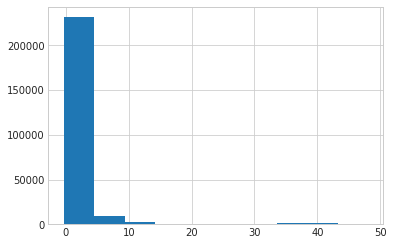

In [24]:
plt.hist(d)

In [25]:
from scipy.stats import ks_2samp

In [26]:
p = []

for i in range(np.shape(distribution1)[0]):
    p.append(ks_2samp(distribution2_final[i], distribution1_final[i]).pvalue)
    

In [27]:
sum(p)/len(p)

0.7152480983713956

In [28]:
b = [i for i in p if i>0.5]

len(b)/len(p)

0.8723288532198801

(array([ 31689.,      0.,      0.,      0.,      0., 105394.,      0.,
             0.,      0., 111125.]),
 array([0.1 , 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91, 1.  ]),
 <a list of 10 Patch objects>)

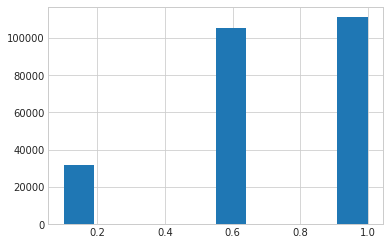

In [29]:
plt.hist(p)

# 
2. Remove 2 char words

In [30]:
X_train_wo_2char = remove_two_and_single_char_words(X_train)

In [31]:
pipe2 = pipeline_LR_HP(100)

pipe2.fit(X_train_wo_2char, Y_train)

/home/jupyter/libraries/nb_env/lib64/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(steps=[('vect', TfidfVectorizer(min_df=10)),
                ('clf',
                 LogisticRegression(C=250, class_weight='balanced',
                                    penalty='l1', solver='saga'))])

In [63]:
distribution3 = pipe2.predict_proba(X_test)

In [65]:
distribution3_final = [[0,0,0] for i in range(np.shape(distribution3)[0])]

for i in range(np.shape(distribution1)[0]):
    
    for j in range(3):
        
        distribution3_final[i][j] = distribution3[i][arr_indx[i][j]]
        

In [66]:
d_3_1 = []

for i in range(np.shape(distribution3_final)[0]):
    
    d_3_1.append(rel_entr(distribution3_final[i], distribution1_final[i]).sum())
    
# kl_convergence(new,old)

In [67]:
sum(d_3_1)/len(d_3_1)

2.5448063209898306

In [71]:
c = [i for i in d_3_1 if i<10]

len(c)/len(d)

0.9172145942113067

(array([2.29242e+05, 1.41010e+04, 4.19200e+03, 1.86000e+02, 1.80000e+01,
        6.20000e+01, 9.00000e+01, 1.36000e+02, 1.15000e+02, 6.60000e+01]),
 array([ -0.36782356,  11.16876779,  22.70535914,  34.24195049,
         45.77854184,  57.31513319,  68.85172454,  80.38831589,
         91.92490724, 103.46149859, 114.99808994]),
 <a list of 10 Patch objects>)

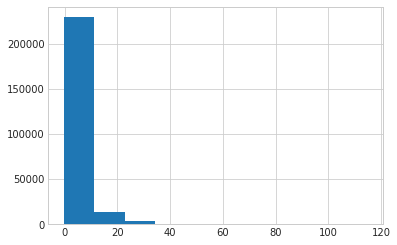

In [72]:
plt.hist(d_3_1)

In [73]:
p3 = []

for i in range(np.shape(distribution3_final)[0]):
    p3.append(ks_2samp(distribution3_final[i], distribution1_final[i]).pvalue)
    

In [74]:
sum(p3)/len(p3)

0.7927000741331854

In [77]:
op = [i for i in p3 if i>0.5]

len(op)/len(p3)

0.9642759298652743

(array([  8867.,      0.,      0.,      0.,      0., 108683.,      0.,
             0.,      0., 130658.]),
 array([0.1 , 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91, 1.  ]),
 <a list of 10 Patch objects>)

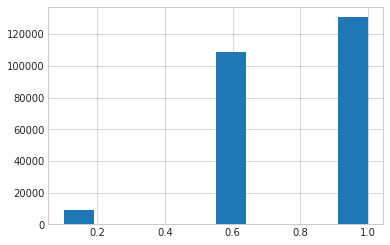

In [76]:
plt.hist(p3)

# 
3. Remove numbers plus 2 char words

In [80]:
X_train_wo_numbers_2char = remove_two_and_single_char_words(X_train_updated)

In [81]:
pipe3 = pipeline_LR_HP(100)
pipe3.fit(X_train_wo_numbers_2char, Y_train)

/home/jupyter/libraries/nb_env/lib64/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(steps=[('vect', TfidfVectorizer(min_df=10)),
                ('clf',
                 LogisticRegression(C=250, class_weight='balanced',
                                    penalty='l1', solver='saga'))])

In [82]:
distribution4 = pipe3.predict_proba(X_test_updated)

In [83]:
distribution4_final = [[0,0,0] for i in range(np.shape(distribution4)[0])]

for i in range(np.shape(distribution1)[0]):
    
    for j in range(3):
        
        distribution4_final[i][j] = distribution4[i][arr_indx[i][j]]
        

In [84]:
d_4_1 = []

for i in range(np.shape(distribution1)[0]):
    
    d_4_1.append(rel_entr(distribution4_final[i], distribution1_final[i]).sum())
    
# kl_convergence(new,old)

In [85]:
sum(d_4_1)/len(d_4_1)

2.0185698134011756

In [89]:
w = [i for i in d_4_1 if i<10]

len(w)/len(d_4_1)

0.9353002320634307

(array([2.34965e+05, 1.02220e+04, 2.46700e+03, 1.98000e+02, 5.30000e+01,
        9.60000e+01, 6.00000e+01, 4.50000e+01, 3.90000e+01, 6.30000e+01]),
 array([ -0.36780182,  10.90293897,  22.17367977,  33.44442057,
         44.71516137,  55.98590216,  67.25664296,  78.52738376,
         89.79812456, 101.06886535, 112.33960615]),
 <a list of 10 Patch objects>)

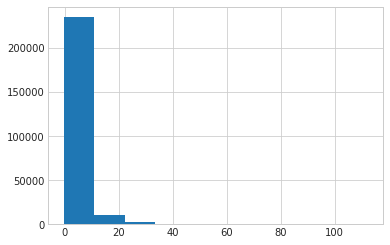

In [87]:
plt.hist(d_4_1)

In [90]:
p4 = []

for i in range(np.shape(distribution4_final)[0]):
    p4.append(ks_2samp(distribution4_final[i], distribution1_final[i]).pvalue)
    

In [91]:
sum(p4)/len(p4)

0.7601934667717367

In [96]:
op1 = [i for i in p4 if i>0.9]

len(op1)/len(p4)

0.47567765744859153

(array([ 14931.,      0.,      0.,      0.,      0., 115210.,      0.,
             0.,      0., 118067.]),
 array([0.1 , 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91, 1.  ]),
 <a list of 10 Patch objects>)

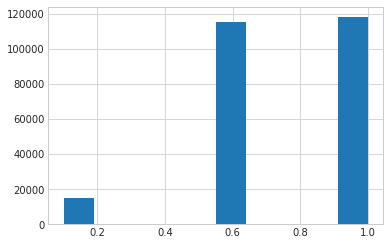

In [93]:
plt.hist(p4)